In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from matplotlib.widgets import CheckButtons

In [2]:
# import a file that contains missing data
bethel = pd.read_excel('../Cleaned_data/RuralAk/RuralAK_Bethel_cleaned.xlsx')

In [3]:
# get the index of the Missing data
index = bethel['Energy'].index[bethel['Energy'].apply(np.isnan)]
bethel_index = bethel.index.values.tolist()
a = [bethel_index.index(i) for i in index]
a

[41, 42, 43, 44, 45, 46, 47, 63, 64, 65, 66, 67]

In [4]:
# Create a function that will calculate the average of the same month in recent years
def filling_missing_data(dataframe):
    
    """The function will filled the missing point in a dataframe with the average of the same month in the recent
       years
       
       Args:
            dataframe(string):the name of the dataframe.
            
       Returns:
            A new dataframe
      """
    
    #get the index of the Missing data        
    index = dataframe['Energy'].index[dataframe['Energy'].apply(np.isnan)]
    dataframe_index = dataframe.index.values.tolist()
    a = [dataframe_index.index(i) for i in index]
    dataframe['Status']=""
    
    # extract the same months' data and calculate the average
    for i in a :
        Index_of_Month = []
        Energy_of_month=[]
        for n in range(len(dataframe)):
            if dataframe['Month'][n]==dataframe['Month'][i]:
                Index_of_Month.append(n)
        for c in Index_of_Month:
            Energy_of_month.append(dataframe['Energy'][c])
        average = np.nanmean(Energy_of_month)
        dataframe['Energy'][i] = average
        dataframe['Status'][i] = 0
      
    return(dataframe)

In [5]:
filling_missing_data(bethel)

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Year,Month,Energy,DC Capacity,Location,Status
0,2012,October,950.000000,10.0,Bethel,
1,2012,November,739.000000,NaN,NaN,
2,2012,December,370.000000,NaN,NaN,
3,2013,January,329.000000,NaN,NaN,
4,2013,February,730.000000,NaN,NaN,
5,2013,March,1575.000000,NaN,NaN,
6,2013,April,2374.000000,NaN,NaN,
7,2013,May,1902.000000,NaN,NaN,
8,2013,June,1481.000000,NaN,NaN,
9,2013,July,1127.000000,NaN,NaN,


In [6]:
#So ,right now it seems that we get what we want.

In [7]:
from figures.csv_figures import add_time_col
from figures.csv_figures import annual_Norm

In [8]:
bethel_new = add_time_col(bethel)

/Users/guge/Desktop/acep-solar/new/ACEP_solar/GEGU/figures/csv_figures.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dataframe['Date'][i] = str(dataframe['Year'][i]) + '-' + str(dataframe['Month'][i])


In [9]:
bethel_annual_values,bethel_month = annual_Norm(bethel)

In [10]:
new_b = pd.DataFrame({'Date':bethel_month,'DBoccia':bethel_annual_values})

/miniconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


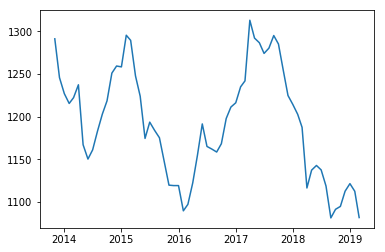

In [11]:
plt.plot(new_b['Date'],new_b['DBoccia'])

In [13]:
# Get the data from the PV Watts --TMY2
list_parameters = {"formt": 'JSON', "api_key": "spJFj2l5ghY5jwk7dNfVYs3JHbpR6BOGHQNO8Y9Z", "system_capacity": 14, "module_type": 0, "losses": 14.08,
              "array_type": 0, "tilt": 50, "azimuth": 180, "lat": 61.21, "lon": -149.89, "dataset": 'tmy2'}
json_response = requests.get("https://developer.nrel.gov/api/pvwatts/v6", params = list_parameters).json()
TMY2 = pd.DataFrame(data = json_response['outputs'])
# Get the data from the PV Watts --TMY2
list_parameters = {"formt": 'JSON', "api_key": "spJFj2l5ghY5jwk7dNfVYs3JHbpR6BOGHQNO8Y9Z", "system_capacity": 14, "module_type": 0, "losses": 14.08,
              "array_type": 0, "tilt": 50, "azimuth": 180, "lat": 61.20, "lon": -149.73, "dataset": 'tmy3'}
json_response = requests.get("https://developer.nrel.gov/api/pvwatts/v6", params = list_parameters).json()
TMY3 = pd.DataFrame(data = json_response['outputs'])

In [14]:
TMY2_low = TMY2['ac_annual'][2]*0.95/14
TMY2_high = TMY2['ac_annual'][2]*1.05/14

TMY3_low = TMY3['ac_annual'][2]*0.95/14
TMY3_high = TMY3['ac_annual'][2]*1.05/14

In [15]:
new_b['TMY2_low'] = TMY2_low
new_b['TMY2_high'] = TMY2_high
new_b['TMY3_low'] = TMY3_low
new_b['TMY3_high'] = TMY3_high

In [16]:
# So now, let's try to draw a plot with checkbox
%matplotlib qt5
fig, ax = plt.subplots(figsize = (15, 8))
x = new_b['Date']


y_D = new_b['DBoccia']
l0, = ax.plot(x ,y_D,label='DBoccia')

# y_L = Anchorage_16['LWaller']
# l1, = ax.plot(x ,y_L,label='LWaller')


# y_M = Anchorage_16['MAngstman']
# l2, = ax.plot(x ,y_M)


# y_May = Anchorage_16['May']
# l3, = ax.plot(x ,y_May)

# y_P = Anchorage_16['Pcrofut']
# l4, = ax.plot(x,y_P,label='Pcrofut')


#y_S = Anchorage_16['SDowns']
#l5, = ax.plot(x,y_S,label = 'SDowns(BP)')

# y_mean = Anchorage_16['Mean']
# l6, = ax.plot(x,y_mean,label='Mean')

#y_TMY2 = Anchorage_16['TMY2']
#l7, = ax.plot(x,y_TMY2,'--',label = 'TMY2_ac_monthly')

#y_TMY3 = Anchorage_16['TMY3']
#l8, = ax.plot(x,y_TMY3,'--',label = 'TMY3_ac_monthly')

y_TMY2_low = new_b['TMY2_low']
l9, = ax.plot(x,y_TMY2_low,'--',label = 'TMY2_low')

y_TMY2_high = new_b['TMY2_high']
l10, = ax.plot(x,y_TMY2_high,'--',label = 'TMY2_high')

y_TMY3_low = new_b['TMY3_low']
l11, = ax.plot(x,y_TMY3_low,'-.',label = 'TMY3_low')

y_TMY3_high = new_b['TMY3_high']
l12, = ax.plot(x,y_TMY3_high,'-.',label = 'TMY3_high')

# # #ax.plot(x=range(len(result['Date'][49:90])),y = result['Mean'][49:90],label='Average')
# # #ax.plot(x=range(len(result['Date'][49:90])),y = result['TMY2_low'][49:90],label='TMY2_low') 
# #ax.plot(x=range(len(result['Date'][49:90])),y = result['TMY2_high'][49:90],label ='TMY2_high')

#this is where we can adjust the subplots side/top/buttom width
# tick_spacing = np.linspace(1, len(Anchorage_16.index)-1,12, dtype = 'int')
# Date_shown = []
# for i in tick_spacing:
#     Date_shown.append(Anchorage_16['Date'][i])
#ax.xticks(tick_spacing,Date_shown)
#plt.annotate('THY2_high',xy=(30,1072.991757),xytext=(32,1100),arrowprops=dict(facecolor='black', shrink=0.05))
#plt.annotate('THY2_low',xy=(10,970.802066),xytext=(6,930),arrowprops=dict(facecolor='black', shrink=0.05))
# ax.set_xticks(tick_spacing)
ax.set_title("Rolling 12-Month Average of Produced Power, Over Time", size = 18)
ax.set_xlabel("Month", size = 14)
ax.set_ylabel("AC Power Produced (kWh) per DC Power Installed (kW)", size = 14)
ax.legend()


plt.subplots_adjust(left=0.2)
lines = [l0,l9, l10, l11, l12]

# Make checkbuttons with all plotted lines with correct visibility
rax = plt.axes([0.005, 0.5, 0.15, 0.4])
labels = [str(line.get_label()) for line in lines]
visibility = [line.get_visible() for line in lines]
check = CheckButtons(rax, labels, visibility)


def func(label):
    index = labels.index(label)
    lines[index].set_visible(not lines[index].get_visible())
    plt.draw()

check.on_clicked(func)


# Some 

plt.show()

#Ok,this seems to be fine,maybe we will talk about it after.